## Data kelompok

Nama Kelompok : Barokah Jaya

Anggota Kelompok:
1. Arifehan Maulana
2. Nasrul Amin Muis

## Import library dan dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

warnings.filterwarnings('ignore')

In [2]:
!curl -L -o "student-habits-vs-academic-performance.zip"\
  https://www.kaggle.com/api/v1/datasets/download/jayaantanaath/student-habits-vs-academic-performance
!unzip "student-habits-vs-academic-performance.zip"
!rm "student-habits-vs-academic-performance.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19512  100 19512    0     0  20632      0 --:--:-- --:--:-- --:--:-- 20632
Archive:  student-habits-vs-academic-performance.zip
  inflating: student_habits_performance.csv  


In [3]:
df = pd.read_csv('/content/student_habits_performance.csv')

## Eksplorasi Data

In [4]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [6]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [8]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [9]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [10]:
df.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(1000, 16)

In [13]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

## Data Prepocessing

In [14]:
df.drop('student_id', axis=1, inplace=True)

In [15]:
df.dropna(axis=0, how='any', inplace=True)

In [16]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'exercise_frequency',
                    'parental_education_level', 'internet_quality', 'mental_health_rating',
                    'extracurricular_participation']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=['age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'])

df_scaled

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1.097025,-0.987703,-2.409063,-1.120653,-0.682160,-0.524304,0.118506,1.252562,-1.003360,1.449141,1.652907,-1.097370,0.887113,1.464694,-0.789486
1,-0.206499,-0.987703,2.288261,0.253727,0.438642,-0.524304,1.420311,-1.538274,0.339872,1.449141,0.276998,-1.097370,0.887113,-0.682736,1.799148
2,0.228009,0.765856,-1.455982,0.511424,-0.495360,-0.524304,1.155716,1.252562,1.683104,-1.008451,0.276998,1.736463,-1.563908,-0.682736,-2.083803
3,1.097025,-0.987703,-1.728291,1.198614,-0.775560,-0.524304,-1.363223,2.237564,1.683104,0.466104,1.652907,0.319547,-1.563908,1.464694,-2.527062
4,-0.641007,-0.987703,0.994795,1.628108,-1.242561,-0.524304,0.742949,-1.292024,-1.003360,-0.025414,1.652907,0.319547,-1.563908,-0.682736,-0.186653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.228009,-0.987703,-0.639057,-1.721945,-0.215159,-0.524304,-0.728197,0.842145,-1.003360,-0.516932,0.276998,0.319547,0.186822,1.464694,0.386629
905,-1.510022,-0.987703,-0.434825,-1.292451,0.532042,1.907290,0.224344,0.267561,1.683104,-1.008451,0.276998,-1.097370,0.186822,1.464694,-0.216204
906,-0.206499,0.765856,-0.366748,0.081930,-0.495360,-0.524304,-2.326347,0.021311,0.339872,0.957622,-1.098911,0.319547,1.237259,1.464694,-0.304856
907,1.531533,0.765856,1.267104,1.370412,-0.682160,1.907290,1.706073,0.924229,-1.003360,-1.499969,-1.098911,-1.097370,-1.563908,-0.682736,0.008381


## Visualisasi Data

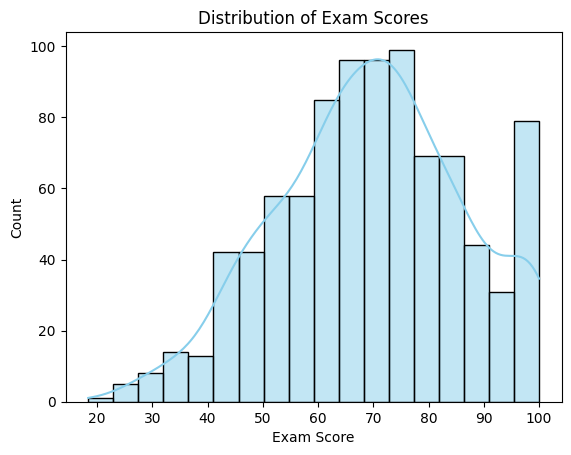

In [18]:
sns.histplot(data=df, x='exam_score', kde=True, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

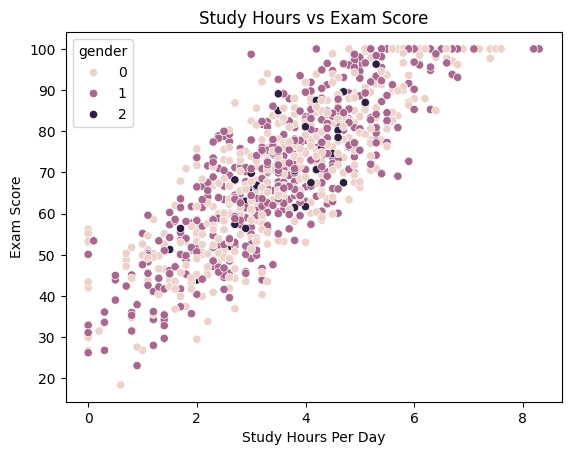

In [19]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.show()


In [20]:
df['gender']

,gender
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,1
998,1


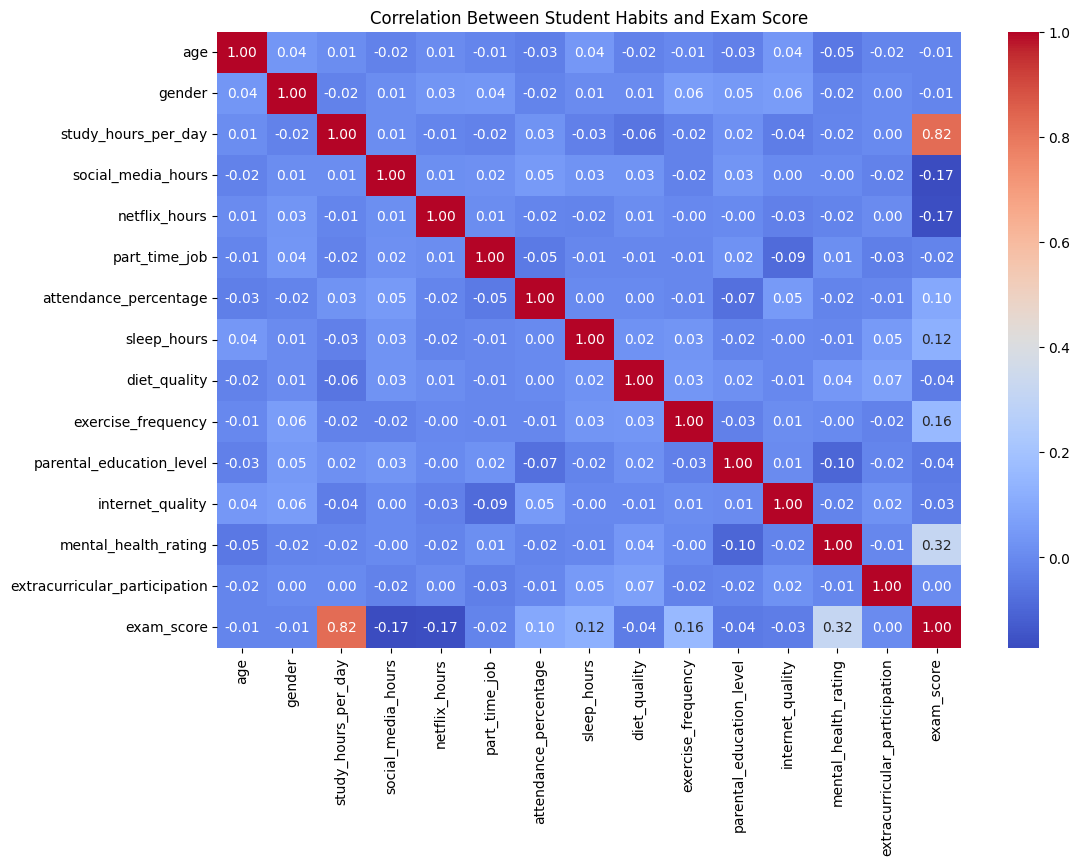

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Student Habits and Exam Score')
plt.show()


## klasifikasi

### auto ml

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X = df_scaled.drop(axis=0, columns='exam_score')
y = (df['exam_score'] >= 70).astype(int)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y ,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [24]:
y.value_counts()

,count
exam_score,
1,461
0,448


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

Logistic Regression Accuracy: 90.11%


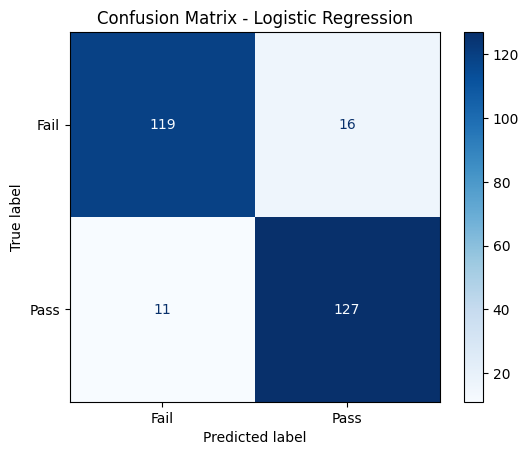

Decision Tree Accuracy: 83.15%


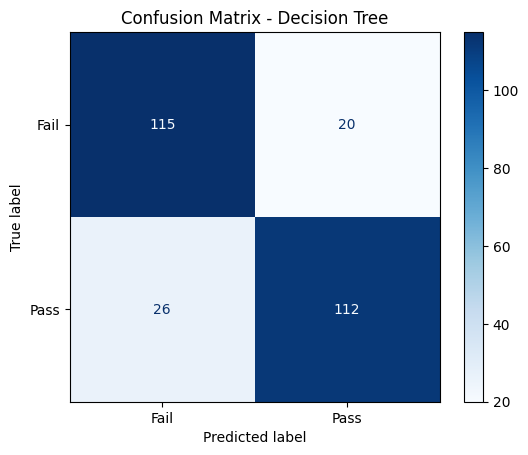

Random Forest Accuracy: 89.38%


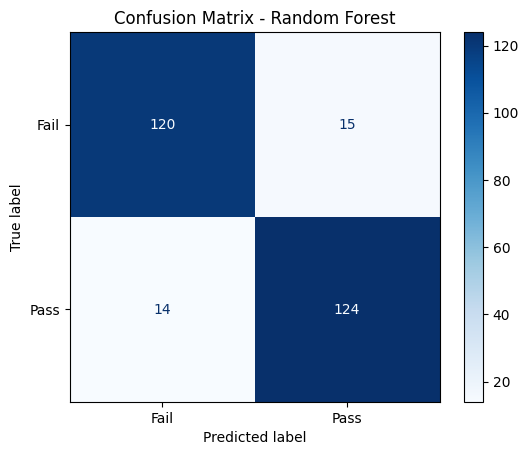

SVM Accuracy: 88.64%


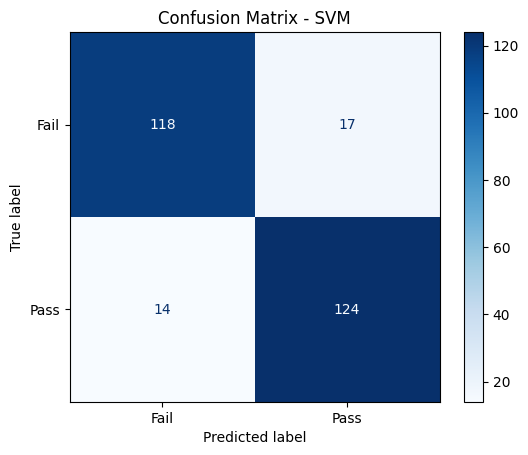

KNN Accuracy: 75.46%


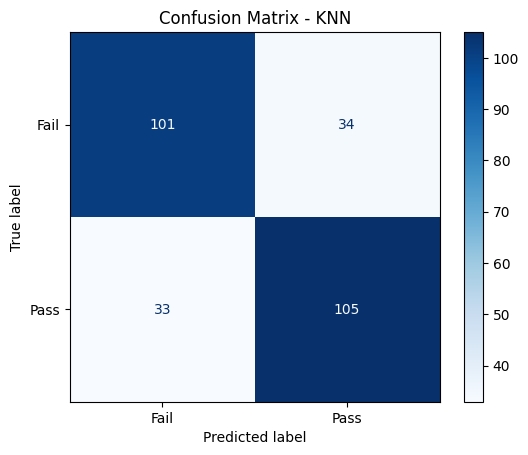

Gradient Boosting Accuracy: 86.81%


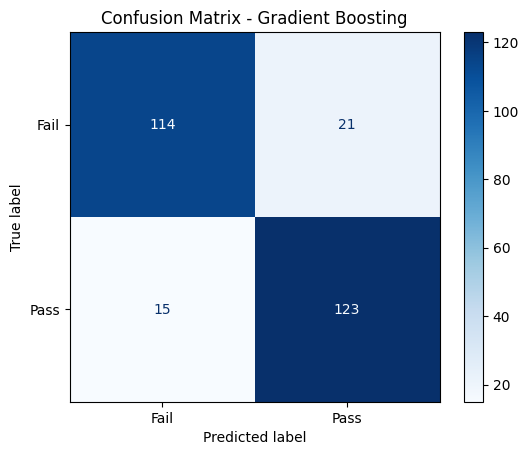

In [26]:
for name, model in models.items():
    model.fit(X_train2, y_train2)
    preds = model.predict(X_test2)
    acc = accuracy_score(y_test2, preds) * 100
    cm = confusion_matrix(y_test2, preds)

    print(f"{name} Accuracy: {acc:.2f}%")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

### Grid Search

In [27]:
base_log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [28]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('logreg', base_log_reg)
])


In [29]:
param_grid_lr = [
    {
        'logreg__penalty': ['l1'],
        'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logreg__solver': ['liblinear', 'saga'] # 'liblinear' and 'saga' support 'l1'
                                              # 'saga' might need max_iter increased, which you have.
    },
    {
        'logreg__penalty': ['l2'],
        'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'] # Most solvers support 'l2'
    },
    {
        'logreg__penalty': ['elasticnet'],
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__solver': ['saga'], # 'saga' supports 'elasticnet'
        'logreg__l1_ratio': [0.3, 0.5, 0.7]
    },
    # 'none' penalty (no regularization) can also be tried if solver supports it
    # e.g., {'logreg__penalty': [None], 'logreg__solver': ['lbfgs', 'saga']} (for sklearn >= 1.2, use None instead of 'none')
]

In [30]:
from sklearn.model_selection import GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

print("Starting Grid Search for Logistic Regression...")
grid_search_lr.fit(X_train2, y_train2)

print("\nBest hyperparameters found for Logistic Regression:")
print(grid_search_lr.best_params_)

print("\nBest cross-validation score (accuracy):")
print(f"{grid_search_lr.best_score_:.4f}")

best_logistic_regression_model = grid_search_lr.best_estimator_
print("\nBest estimator (pipeline):")
print(best_logistic_regression_model)

test_accuracy = best_logistic_regression_model.score(X_test2, y_test2)
print(f"\nAccuracy on the test set with the best model: {test_accuracy:.4f}")


Starting Grid Search for Logistic Regression...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best hyperparameters found for Logistic Regression:
{'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

Best cross-validation score (accuracy):
0.8915

Best estimator (pipeline):
Pipeline(steps=[('logreg',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Accuracy on the test set with the best model: 0.9011


### feature Selection


--- Menggunakan SelectKBest (k=8) ---
Fitur terpilih oleh SelectKBest: ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'parental_education_level', 'mental_health_rating']
Bentuk X_train setelah SelectKBest: (636, 8)
Bentuk X_test setelah SelectKBest: (273, 8)

--- Model Training dan Evaluasi dengan Fitur Terpilih ---
Logistic Regression Accuracy: 91.21%


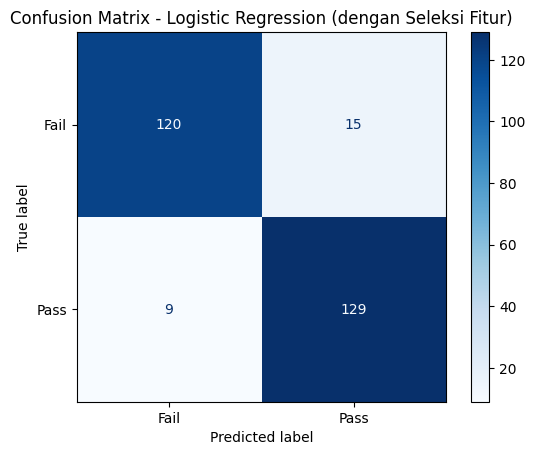

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif # Untuk klasifikasi
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # Contoh untuk SelectFromModel


# --- PILIH SALAH SATU METODE SELEKSI FITUR DI BAWAH INI ---
# Anda bisa meng-uncomment salah satu blok untuk mencoba metode yang berbeda.

# ---------------------------------------------------------------------------
# OPSI 1: SelectKBest (menggunakan f_classif untuk klasifikasi)
# ---------------------------------------------------------------------------
k_best_features = 8 # Pilih jumlah fitur yang diinginkan
print(f"\n--- Menggunakan SelectKBest (k={k_best_features}) ---")
selector_kbest = SelectKBest(score_func=f_classif, k=k_best_features)
X_train_fs = selector_kbest.fit_transform(X_train2, y_train2)
X_test_fs = selector_kbest.transform(X_test2)

# Dapatkan nama fitur yang dipilih (jika X_train2 adalah DataFrame)
if isinstance(X_train2, pd.DataFrame):
    selected_features_kbest_indices = selector_kbest.get_support(indices=True)
    selected_features_kbest_names = X_train2.columns[selected_features_kbest_indices].tolist()
    print(f"Fitur terpilih oleh SelectKBest: {selected_features_kbest_names}")
else:
    print(f"Fitur terpilih oleh SelectKBest (indeks): {selector_kbest.get_support(indices=True)}")
print(f"Bentuk X_train setelah SelectKBest: {X_train_fs.shape}")
print(f"Bentuk X_test setelah SelectKBest: {X_test_fs.shape}")
# ---------------------------------------------------------------------------


# ---------------------------------------------------------------------------
# # OPSI 2: Recursive Feature Elimination (RFE)
# # ---------------------------------------------------------------------------
# n_features_to_select_rfe = 8 # Pilih jumlah fitur yang diinginkan
# print(f"\n--- Menggunakan RFE (n_features_to_select={n_features_to_select_rfe}) ---")
# # Model dasar untuk RFE (harus memiliki atribut coef_ atau feature_importances_)
# rfe_estimator = LogisticRegression(solver='liblinear', max_iter=100, random_state=42)
# selector_rfe = RFE(estimator=rfe_estimator, n_features_to_select=n_features_to_select_rfe, step=1)
# X_train_fs = selector_rfe.fit_transform(X_train2, y_train2)
# X_test_fs = selector_rfe.transform(X_test2)

# # Dapatkan nama fitur yang dipilih (jika X_train2 adalah DataFrame)
# if isinstance(X_train2, pd.DataFrame):
#     selected_features_rfe_indices = selector_rfe.get_support(indices=True)
#     selected_features_rfe_names = X_train2.columns[selected_features_rfe_indices].tolist()
#     print(f"Fitur terpilih oleh RFE: {selected_features_rfe_names}")
# else:
#     print(f"Fitur terpilih oleh RFE (indeks): {selector_rfe.get_support(indices=True)}")
# print(f"Bentuk X_train setelah RFE: {X_train_fs.shape}")
# print(f"Bentuk X_test setelah RFE: {X_test_fs.shape}")
# # ---------------------------------------------------------------------------


# ---------------------------------------------------------------------------
# # OPSI 3: SelectFromModel (menggunakan Logistic Regression dengan L1 penalty)
# # ---------------------------------------------------------------------------
# print(f"\n--- Menggunakan SelectFromModel dengan Logistic Regression (L1) ---")
# # Model dengan L1 penalty akan menyusutkan koefisien fitur yang kurang penting menjadi nol.
# # 'liblinear' dan 'saga' mendukung L1. 'C' adalah invers dari kekuatan regularisasi.
# # C yang lebih kecil berarti regularisasi lebih kuat (lebih banyak fitur mungkin dihilangkan).
# sfm_estimator_l1 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
# # threshold="median" akan memilih fitur yang koefisiennya di atas median koefisien absolut.
# # Anda juga bisa menggunakan nilai float, misal 1e-5, untuk memilih fitur dengan koefisien non-nol.
# # Atau, set max_features jika Anda tahu berapa banyak fitur yang Anda inginkan.
# selector_sfm_l1 = SelectFromModel(estimator=sfm_estimator_l1, threshold="median") # atau threshold=1e-5, atau max_features=N
# X_train_fs = selector_sfm_l1.fit_transform(X_train2, y_train2)
# X_test_fs = selector_sfm_l1.transform(X_test2)

# # Dapatkan nama fitur yang dipilih (jika X_train2 adalah DataFrame)
# if isinstance(X_train2, pd.DataFrame):
#     selected_features_sfm_l1_indices = selector_sfm_l1.get_support(indices=True)
#     selected_features_sfm_l1_names = X_train2.columns[selected_features_sfm_l1_indices].tolist()
#     print(f"Fitur terpilih oleh SelectFromModel (L1): {selected_features_sfm_l1_names}")
# else:
#     print(f"Fitur terpilih oleh SelectFromModel (L1) (indeks): {selector_sfm_l1.get_support(indices=True)}")
# print(f"Bentuk X_train setelah SelectFromModel (L1): {X_train_fs.shape}")
# print(f"Bentuk X_test setelah SelectFromModel (L1): {X_test_fs.shape}")
# # ---------------------------------------------------------------------------


# ---------------------------------------------------------------------------
# # OPSI 4: SelectFromModel (menggunakan RandomForestClassifier)
# # ---------------------------------------------------------------------------
# print(f"\n--- Menggunakan SelectFromModel dengan RandomForestClassifier ---")
# n_features_to_select_rf = 7 # Pilih jumlah fitur yang diinginkan
# sfm_estimator_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# # threshold=-np.inf agar max_features yang menentukan jumlah fitur
# selector_sfm_rf = SelectFromModel(estimator=sfm_estimator_rf, max_features=n_features_to_select_rf, threshold=-np.inf)
# X_train_fs = selector_sfm_rf.fit_transform(X_train2, y_train2)
# X_test_fs = selector_sfm_rf.transform(X_test2)

# # Dapatkan nama fitur yang dipilih (jika X_train2 adalah DataFrame)
# if isinstance(X_train2, pd.DataFrame):
#     selected_features_sfm_rf_indices = selector_sfm_rf.get_support(indices=true)
#     selected_features_sfm_rf_names = X_train2.columns[selected_features_sfm_rf_indices].tolist()
#     print(f"Fitur terpilih oleh SelectFromModel (RandomForest): {selected_features_sfm_rf_names}")
# else:
#     print(f"Fitur terpilih oleh SelectFromModel (RandomForest) (indeks): {selector_sfm_rf.get_support(indices=true)}")
# print(f"Bentuk X_train setelah SelectFromModel (RandomForest): {X_train_fs.shape}")
# print(f"Bentuk X_test setelah SelectFromModel (RandomForest): {X_test_fs.shape}")
# # ---------------------------------------------------------------------------


# JIKA TIDAK ADA SELEKSI FITUR (untuk perbandingan)
# X_train_fs = X_train2
# X_test_fs = X_test2
# print("\n--- Tidak menggunakan seleksi fitur ---")
# print(f"Bentuk X_train: {X_train_fs.shape}")
# print(f"Bentuk X_test: {X_test_fs.shape}")

# --- Bagian Model Training dan Evaluasi (MENGGUNAKAN FITUR YANG TELAH DIPILIH) ---
print("\n--- Model Training dan Evaluasi dengan Fitur Terpilih ---")
models = {
    "Logistic Regression": LogisticRegression(C=10, max_iter=1000, random_state=42,
                                    solver='liblinear'),
}
for name, model in models.items():
    # Gunakan X_train_fs dan X_test_fs yang sudah diseleksi fiturnya
    model.fit(X_train_fs, y_train2)
    preds = model.predict(X_test_fs)
    acc = accuracy_score(y_test2, preds) * 100
    cm = confusion_matrix(y_test2, preds)

    print(f"{name} Accuracy: {acc:.2f}%")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (dengan Seleksi Fitur)')
    plt.show()

### ekspor model


In [32]:
import joblib
joblib.dump(model, 'habit_vs_exam_model.pkl')

['habit_vs_exam_model.pkl']